## **Multi-Class Text Classification for make-up products by using Neural Networks**

In this project, we used Neural Network and Convolutional Neural Netwok to the text classification. In our analysis we used Keras framework. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix
from keras.metrics.

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout, GlobalMaxPool1D, Conv1D
from tensorflow.keras.layers import Embedding
from keras.preprocessing import text, sequence
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras import utils


C:\Users\hritvik.patwa\AppData\Roaming\Python\Python39\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (5.0.0)/charset_normalizer (2.0.6) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
df = pd.read_csv(r'data/products_clean.csv', header=0,index_col=0)
df.head()

,product_type,description
0,lipstic,lippie pencil long wearing high intensity lip ...
1,lipstic,blotted lip sheer matte lipstick creates perfe...
2,lipstic,lippie stix formula contains vitamin e mango a...
3,foundation,developed selfie age buildable full coverage n...
4,lipstic,product free lead heavy metal parabens phthala...


In [3]:
df.shape

(906, 2)

Spliting the data into train and test sets:

In [4]:
sentences = df['description']
y = df['product_type']

sentences_train, sentences_test, train_y, test_y = train_test_split(sentences, y, test_size=0.25, random_state=42)

**Word Embeddings**

Word Embedding is a representation of text where words that have the same meaning have a similar representation. It shows words in a coordinate system where related words, based on a corpus of relationships, are placed closer together. In the deep learning frameworks such as  Keras, this part is generally handled by an embedding layer.

In [42]:
tokenize = Tokenizer(num_words=1000)
tokenize.fit_on_texts(sentences_train)

X_train = tokenize.texts_to_sequences(sentences_train)
X_test = tokenize.texts_to_sequences(sentences_test)

vocab_size = len(tokenize.word_index) + 1  

print(sentences_train[2])
print(X_train[2])

lippie stix formula contains vitamin e mango avocado shea butter added comfort moisture none lippie formula contain nasty ingredient like parabens sulfate
[55, 358, 162, 810, 22, 121, 117, 500, 22, 198, 265, 4, 194, 14, 272, 321, 698, 218, 214, 596, 402, 597, 84, 93, 632, 288, 296, 237, 413]


In [44]:
maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

print(X_train[2, :])

[ 55 358 162 810  22 121 117 500  22 198 265   4 194  14 272 321 698 218
 214 596 402 597  84  93 632 288 296 237 413   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


In [45]:
encoder = LabelEncoder()
encoder.fit(train_y)
y_train = encoder.transform(train_y)
y_test = encoder.transform(test_y)

num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

**Building the neural network model**

We built and trained a several models to choose best of them. First of them is a simple neural network model.

In [50]:
embedding_dim = 16

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 16)           72304     
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_12 (Dense)            (None, 16)                25616     
                                                                 
 dense_13 (Dense)            (None, 5)                 85        
                                                                 
Total params: 98,005
Trainable params: 98,005
Non-trainable params: 0
_________________________________________________________________


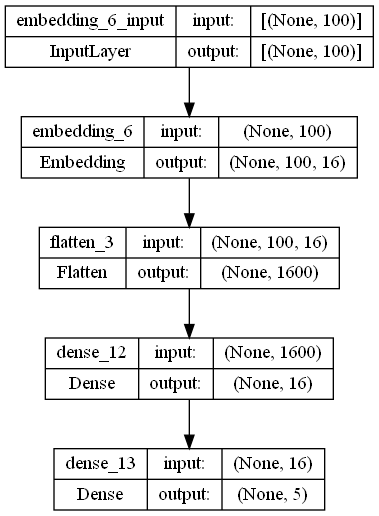

In [51]:
from keras.utils import plot_model
plot_model(model, to_file='model_1.png', show_shapes=True, show_layer_names=True)

In [11]:
history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=15,
                    validation_data=(X_test, y_test))

Epoch 1/15
22/22 [==============================] - 0s 7ms/step - loss: 0.0423 - accuracy: 0.9971 - val_loss: 0.2960 - val_accuracy: 0.8987
Epoch 2/15
22/22 [==============================] - 0s 4ms/step - loss: 0.0357 - accuracy: 0.9985 - val_loss: 0.2896 - val_accuracy: 0.9075
Epoch 3/15
22/22 [==============================] - 0s 5ms/step - loss: 0.0299 - accuracy: 0.9971 - val_loss: 0.2817 - val_accuracy: 0.8943
Epoch 4/15
22/22 [==============================] - 0s 4ms/step - loss: 0.0262 - accuracy: 0.9985 - val_loss: 0.2794 - val_accuracy: 0.9075
Epoch 5/15
22/22 [==============================] - 0s 4ms/step - loss: 0.0226 - accuracy: 0.9971 - val_loss: 0.2753 - val_accuracy: 0.9031
Epoch 6/15
22/22 [==============================] - 0s 5ms/step - loss: 0.0202 - accuracy: 0.9971 - val_loss: 0.2720 - val_accuracy: 0.9075
Epoch 7/15
22/22 [==============================] - 0s 4ms/step - loss: 0.0178 - accuracy: 0.9971 - val_loss: 0.2705 - val_accuracy: 0.9031
Epoch 8/15
22/22 [==

In [12]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9985
Testing Accuracy:  0.9119


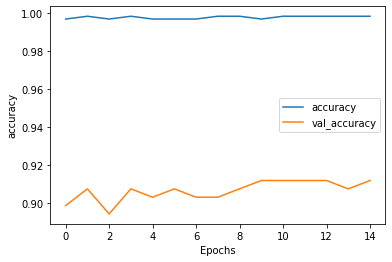

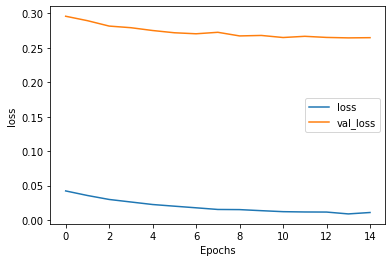

In [13]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

 At the end of the training, we can see that there is a little bit overfitting. 
 
 Now we add dropout layers as a method of regularization.

In [14]:
model2 = Sequential()
model2.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model2.add(Flatten())
model2.add(Dense(16, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(5, activation='softmax'))

model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           72304     
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 16)                25616     
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 5)                 85        
                                                                 
Total params: 98,005
Trainable params: 98,005
Non-trainable params: 0
_________________________________________________________________


In [15]:
history_two = model2.fit(X_train, y_train,
                        batch_size=32,
                        epochs=15,
                        validation_data=(X_test, y_test))

Epoch 1/15
22/22 [==============================] - 1s 12ms/step - loss: 1.5651 - accuracy: 0.3328 - val_loss: 1.4693 - val_accuracy: 0.4758
Epoch 2/15
22/22 [==============================] - 0s 4ms/step - loss: 1.5003 - accuracy: 0.4050 - val_loss: 1.4411 - val_accuracy: 0.4846
Epoch 3/15
22/22 [==============================] - 0s 4ms/step - loss: 1.4806 - accuracy: 0.4153 - val_loss: 1.4385 - val_accuracy: 0.4890
Epoch 4/15
22/22 [==============================] - 0s 5ms/step - loss: 1.4244 - accuracy: 0.4109 - val_loss: 1.3835 - val_accuracy: 0.4978
Epoch 5/15
22/22 [==============================] - 0s 4ms/step - loss: 1.3674 - accuracy: 0.4521 - val_loss: 1.3502 - val_accuracy: 0.5286
Epoch 6/15
22/22 [==============================] - 0s 5ms/step - loss: 1.2470 - accuracy: 0.5155 - val_loss: 1.2178 - val_accuracy: 0.5463
Epoch 7/15
22/22 [==============================] - 0s 5ms/step - loss: 1.1212 - accuracy: 0.5832 - val_loss: 1.0937 - val_accuracy: 0.6784
Epoch 8/15
22/22 [=

In [16]:
loss, accuracy = model2.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model2.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9867
Testing Accuracy:  0.8987


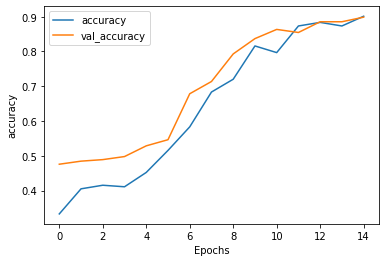

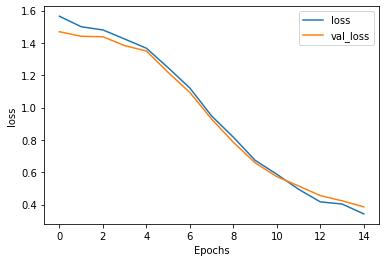

In [17]:
plot_graphs(history_two, "accuracy")
plot_graphs(history_two, "loss")

Another way to work with embeddings is by using a MaxPooling1D/AveragePooling1D or a GlobalMaxPooling1D/GlobalAveragePooling1D layer after the embedding. 

In this case we used GlobalMaxPooling1D which is built-in layer Keras and we can add it to the sequential model:

In [18]:
embedding_dim = 50

model3 = Sequential()
model3.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model3.add(GlobalMaxPool1D())
model3.add(Dense(16, activation='relu'))
model3.add(Dense(5, activation='softmax'))

model3.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 50)           225950    
                                                                 
 global_max_pooling1d (Globa  (None, 50)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_4 (Dense)             (None, 16)                816       
                                                                 
 dense_5 (Dense)             (None, 5)                 85        
                                                                 
Total params: 226,851
Trainable params: 226,851
Non-trainable params: 0
_________________________________________________________________


In [19]:
history_3 = model3.fit(X_train, y_train,
                       batch_size=32,
                       epochs=15,
                       validation_data=(X_test, y_test))

Epoch 1/15
22/22 [==============================] - 1s 14ms/step - loss: 1.5844 - accuracy: 0.3844 - val_loss: 1.5405 - val_accuracy: 0.4670
Epoch 2/15
22/22 [==============================] - 0s 7ms/step - loss: 1.5296 - accuracy: 0.3844 - val_loss: 1.4733 - val_accuracy: 0.4670
Epoch 3/15
22/22 [==============================] - 0s 8ms/step - loss: 1.4685 - accuracy: 0.3844 - val_loss: 1.3937 - val_accuracy: 0.4670
Epoch 4/15
22/22 [==============================] - 0s 7ms/step - loss: 1.3990 - accuracy: 0.3844 - val_loss: 1.3165 - val_accuracy: 0.4670
Epoch 5/15
22/22 [==============================] - 0s 7ms/step - loss: 1.3141 - accuracy: 0.3859 - val_loss: 1.2221 - val_accuracy: 0.4714
Epoch 6/15
22/22 [==============================] - 0s 7ms/step - loss: 1.2017 - accuracy: 0.4566 - val_loss: 1.1088 - val_accuracy: 0.5463
Epoch 7/15
22/22 [==============================] - 0s 7ms/step - loss: 1.0633 - accuracy: 0.6082 - val_loss: 0.9844 - val_accuracy: 0.6476
Epoch 8/15
22/22 [=

In [20]:
loss, accuracy = model3.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model3.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9809
Testing Accuracy:  0.9295


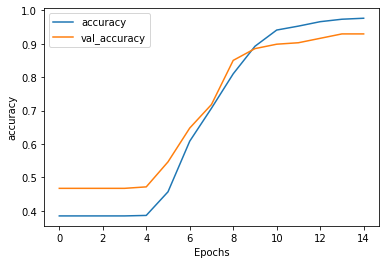

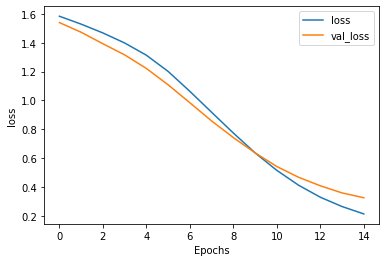

In [21]:
plot_graphs(history_3, "accuracy")
plot_graphs(history_3, "loss")

#### Final Neural Network model

Our final Neural Network consist of an Embedding layer with GlobalMaxPool1D layer, hidden layer using the ReLU activation function. The output layer using the softmax activation function. We also used dropout layers as a method of regularization.
We used the Adam optimizer and categorical cross entropy loss as the loss function.

In [22]:
embedding_dim = 50

model4 = Sequential()
model4.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model4.add(GlobalMaxPool1D())
model4.add(Dropout(0.2))
model4.add(Dense(16, activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(5, activation='softmax'))

model4.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 50)           225950    
                                                                 
 global_max_pooling1d_1 (Glo  (None, 50)               0         
 balMaxPooling1D)                                                
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_6 (Dense)             (None, 16)                816       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_7 (Dense)             (None, 5)                 85        
                                                      

We trained NN model for 15 epoch:

In [23]:
history_4 = model4.fit(X_train, y_train,
                       batch_size=32,
                       epochs=15,
                       validation_data=(X_test, y_test))

Epoch 1/15
22/22 [==============================] - 1s 16ms/step - loss: 1.5852 - accuracy: 0.3623 - val_loss: 1.5470 - val_accuracy: 0.4670
Epoch 2/15
22/22 [==============================] - 0s 7ms/step - loss: 1.5411 - accuracy: 0.3873 - val_loss: 1.4880 - val_accuracy: 0.4670
Epoch 3/15
22/22 [==============================] - 0s 7ms/step - loss: 1.4889 - accuracy: 0.3844 - val_loss: 1.4166 - val_accuracy: 0.4670
Epoch 4/15
22/22 [==============================] - 0s 7ms/step - loss: 1.4285 - accuracy: 0.3844 - val_loss: 1.3492 - val_accuracy: 0.4670
Epoch 5/15
22/22 [==============================] - 0s 7ms/step - loss: 1.3665 - accuracy: 0.3844 - val_loss: 1.2726 - val_accuracy: 0.4670
Epoch 6/15
22/22 [==============================] - 0s 8ms/step - loss: 1.3026 - accuracy: 0.3844 - val_loss: 1.1906 - val_accuracy: 0.4670
Epoch 7/15
22/22 [==============================] - 0s 7ms/step - loss: 1.2112 - accuracy: 0.4448 - val_loss: 1.0946 - val_accuracy: 0.5419
Epoch 8/15
22/22 [=

In [24]:
loss, accuracy = model4.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model4.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.8837
Testing Accuracy:  0.8722


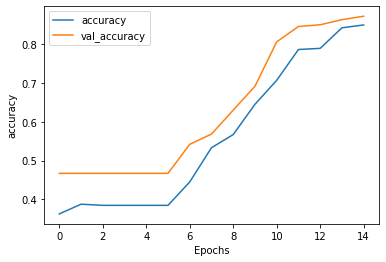

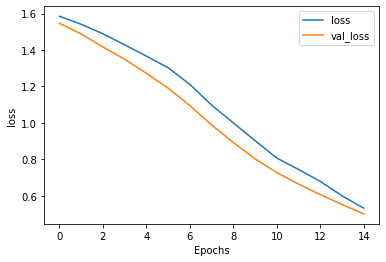

In [25]:
plot_graphs(history_4, "accuracy")
plot_graphs(history_4, "loss")

**Convolutional Neural Network (CNN)**

A simple CNN architecture: Embedding layer with single layer Convolutional Neural Network (with RELU activation), and the GlobalMaxPool1D layer as well. The hidden layer using the ReLU activation function and an output layer using the softmax activation function. We used the Adam optimizer and categorical cross entropy loss as the loss function.

In [26]:
embedding_dim = 50

model5 = Sequential()
model5.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model5.add(Conv1D(128, 5, activation='relu'))
model5.add(GlobalMaxPool1D())
model5.add(Dense(10, activation='relu'))
model5.add(Dense(5, activation='softmax'))

model5.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 50)           225950    
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           32128     
                                                                 
 global_max_pooling1d_2 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
 dense_9 (Dense)             (None, 5)                 55        
                                                                 
Total params: 259,423
Trainable params: 259,423
Non-trainable params: 0
________________________________________________

We trained CNN model for 5 epoch:

In [27]:
history_5 = model5.fit(X_train, y_train,
                       batch_size=10,
                       epochs=5,
                       validation_data=(X_test, y_test))

Epoch 1/5
68/68 [==============================] - 2s 11ms/step - loss: 1.5775 - accuracy: 0.2563 - val_loss: 1.5053 - val_accuracy: 0.3348
Epoch 2/5
68/68 [==============================] - 1s 9ms/step - loss: 1.1979 - accuracy: 0.6701 - val_loss: 0.8974 - val_accuracy: 0.7533
Epoch 3/5
68/68 [==============================] - 1s 10ms/step - loss: 0.5666 - accuracy: 0.8174 - val_loss: 0.4477 - val_accuracy: 0.8767
Epoch 4/5
68/68 [==============================] - 1s 10ms/step - loss: 0.2322 - accuracy: 0.9588 - val_loss: 0.3049 - val_accuracy: 0.9251
Epoch 5/5
68/68 [==============================] - 1s 9ms/step - loss: 0.0888 - accuracy: 0.9897 - val_loss: 0.2747 - val_accuracy: 0.9251


In [28]:
loss, accuracy = model5.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model5.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9985
Testing Accuracy:  0.9251


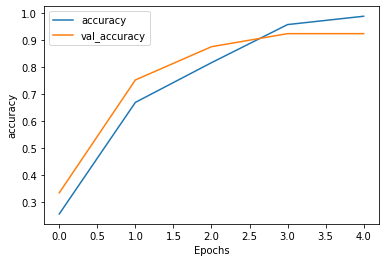

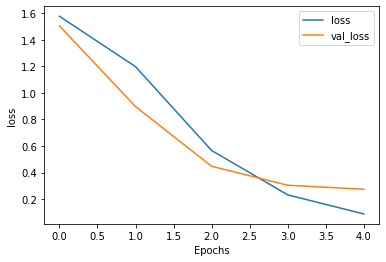

In [29]:
plot_graphs(history_5, "accuracy")
plot_graphs(history_5, "loss")